In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os 
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
os.chdir("/work/signate_practice/lodging_services/input")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

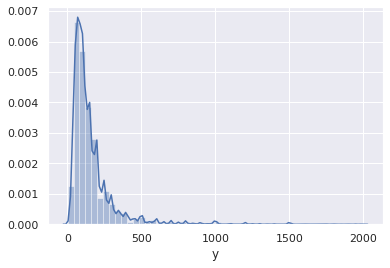

In [3]:
sns.distplot(train["y"])

In [4]:
print(train["y"].skew())
print(train["y"].kurt())

4.264338270527724
26.03094534743773


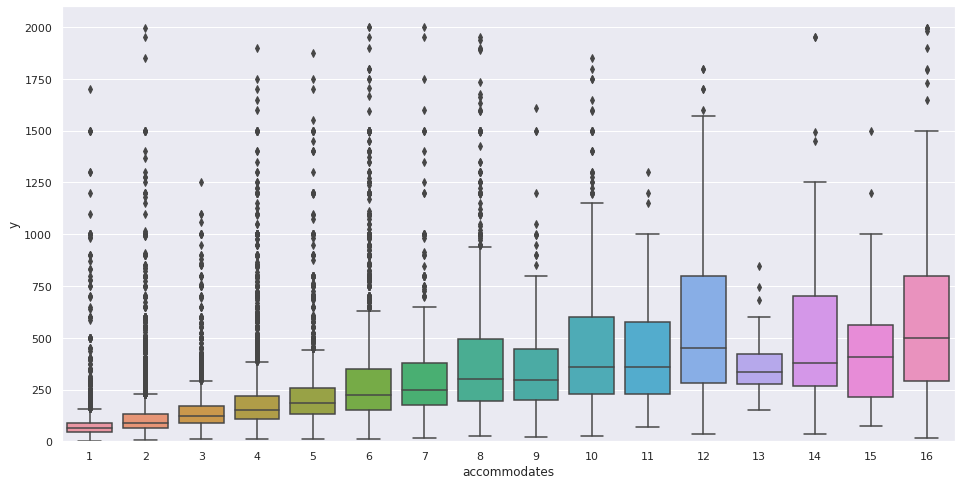

In [5]:
var = "accommodates"
data = pd.concat([train["y"], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="y", data=data)
fig.axis(ymin=0, ymax=2100);
plt.show()

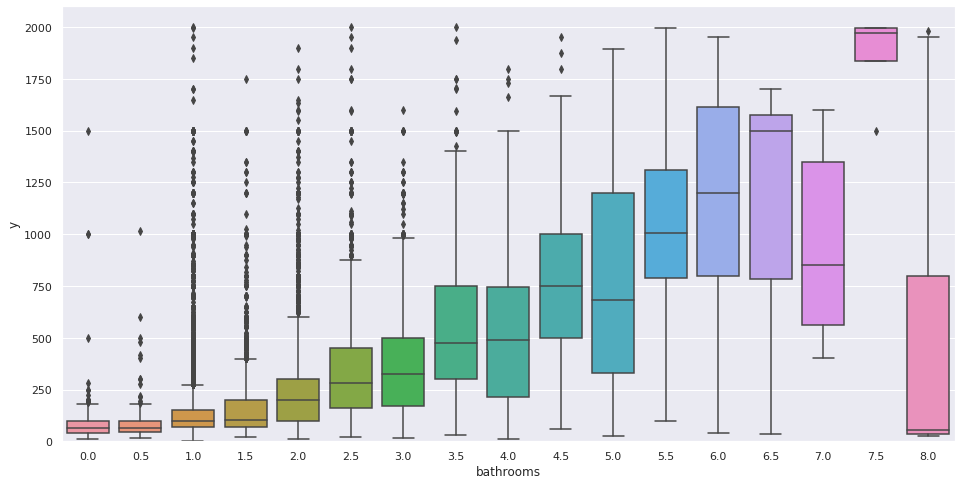

In [6]:
var = "bathrooms"
data = pd.concat([train["y"], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16 ,8))
fig = sns.boxplot(x=var, y="y", data=data)
fig.axis(ymin=0, ymax=2100)
plt.show()

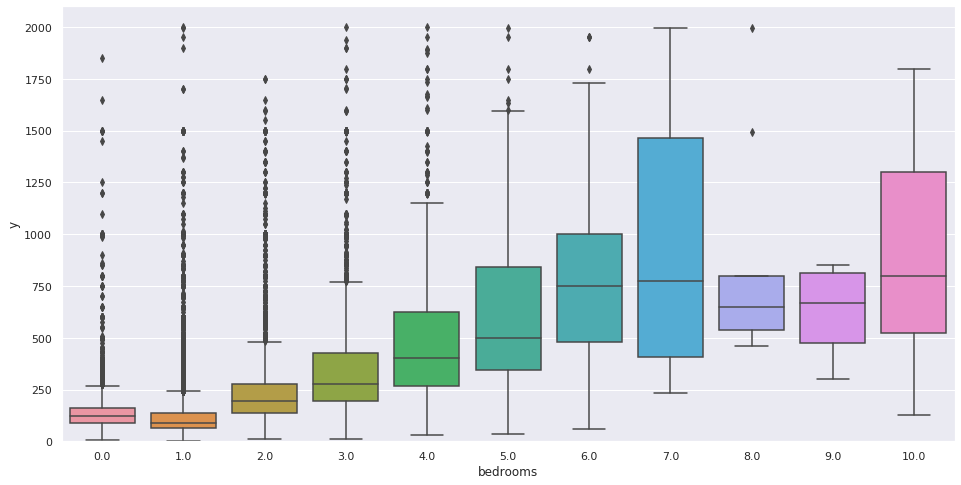

In [7]:
var = "bedrooms"
data = pd.concat([train["y"], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16 ,8))
fig = sns.boxplot(x=var, y="y", data=data)
fig.axis(ymin=0, ymax=2100)
plt.show()

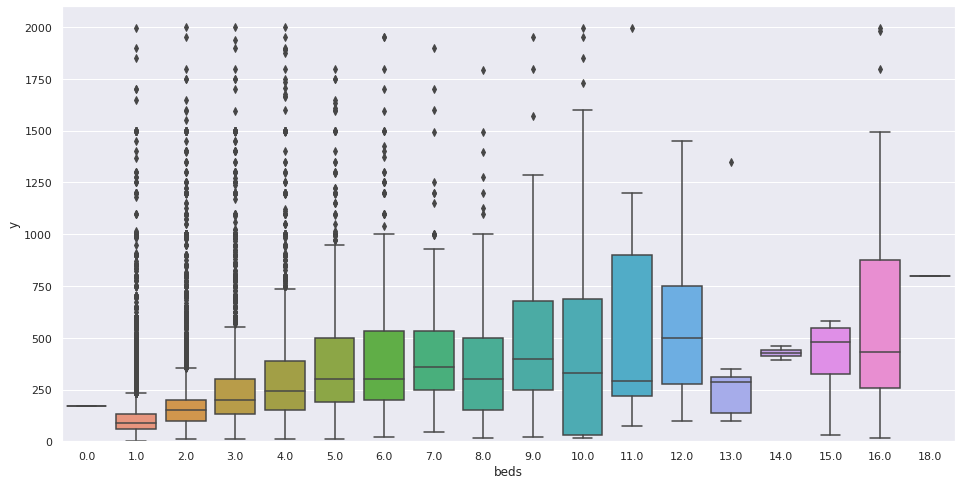

In [8]:
var = "beds"
data = pd.concat([train["y"], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16 ,8))
fig = sns.boxplot(x=var, y="y", data=data)
fig.axis(ymin=0, ymax=2100)
plt.show()


 mu = 160.16 and sigma = 168.09



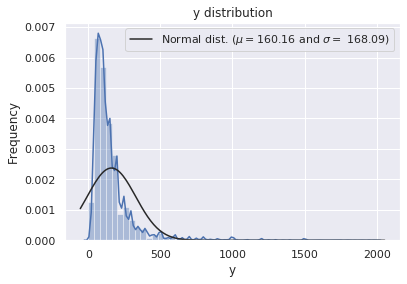

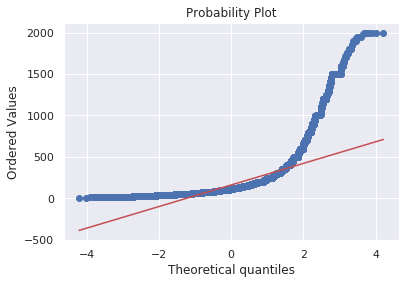

In [9]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(train["y"], fit=norm)

(mu, sigma) = norm.fit(train["y"])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

plt.legend(["Normal dist. ($\mu=${:.2f} and $\sigma=$ {:.2f})".format(mu, sigma)], loc='best')
plt.ylabel("Frequency")
plt.title("y distribution")

fig = plt.figure()
res = stats.probplot(train["y"], plot=plt)
plt.show()


 mu = 4.79 and sigma = 0.71



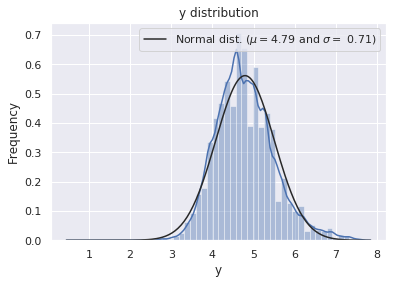

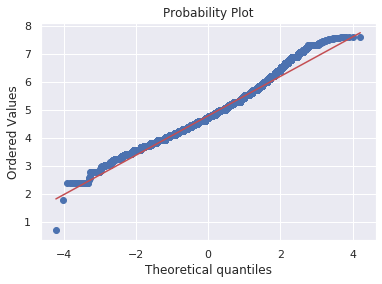

In [10]:
train["y"] = np.log1p(train["y"])

sns.distplot(train["y"], fit=norm)

(mu, sigma) = norm.fit(train["y"])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

plt.legend(["Normal dist. ($\mu=${:.2f} and $\sigma=$ {:.2f})".format(mu, sigma)], loc='best')
plt.ylabel("Frequency")
plt.title("y distribution")

fig = plt.figure()
res = stats.probplot(train["y"], plot=plt)
plt.show()

In [11]:
all_data = pd.concat([train, test]).reset_index(drop=True)
all_data.drop(['y', "id"], axis=1, inplace=True)
print("all_data size: {}".format(all_data.shape))

all_data size: (74111, 27)


In [12]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({"Missing Ratio": all_data_na})
missing_data.head(15)

,Missing Ratio
host_response_rate,24.691341
review_scores_rating,22.563452
first_review,21.405729
last_review,21.355804
thumbnail_url,11.086074
neighbourhood,9.272578
zipcode,1.303450
bathrooms,0.269865
host_since,0.253674
host_identity_verified,0.253674


In [13]:
for c in ("first_review", "last_review", "host_since"):
    all_data[c] = pd.to_datetime(all_data[c])
    all_data[c] = pd.DatetimeIndex(all_data[c])
    all_data[c] = np.log(all_data[c].values.astype(np.float64))
    all_data[c] = all_data[c].fillna(0)
    
for c in ("bathrooms", "beds", "bedrooms"):
    all_data[c] = all_data[c].fillna(1)
    
for c in ("host_response_rate", "neighbourhood", "host_identity_verified",
          "host_has_profile_pic"):
    all_data[c] = all_data[c].fillna("None")
    
all_data["review_scores_rating"].fillna(all_data["review_scores_rating"].median(), inplace=True)
all_data = all_data.drop(["zipcode"], axis=1)

In [14]:
all_data["thumbnail_url"] = all_data["thumbnail_url"].replace({np.nan:0})
def convert_one_hot(x):
    if x != 0:
        return 1
    else:
        return x
all_data["thumbnail_url"] = all_data["thumbnail_url"].apply(convert_one_hot)

In [15]:
all_data["thumbnail_url"].value_counts()

1    65895
0     8216
Name: thumbnail_url, dtype: int64

In [16]:
all_data.dtypes

accommodates                int64
amenities                  object
bathrooms                 float64
bed_type                   object
bedrooms                  float64
beds                      float64
cancellation_policy        object
city                       object
cleaning_fee               object
description                object
first_review              float64
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                float64
instant_bookable           object
last_review               float64
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
property_type              object
review_scores_rating      float64
room_type                  object
thumbnail_url               int64
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
cols = ["bed_type", "cancellation_policy", "city", "cleaning_fee",
        "host_identity_verified", "host_has_profile_pic", "host_response_rate",
       "instant_bookable", "property_type", "room_type", "neighbourhood"]

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
    
all_data.dtypes

accommodates                int64
amenities                  object
bathrooms                 float64
bed_type                    int64
bedrooms                  float64
beds                      float64
cancellation_policy         int64
city                        int64
cleaning_fee                int64
description                object
first_review              float64
host_has_profile_pic        int64
host_identity_verified      int64
host_response_rate          int64
host_since                float64
instant_bookable            int64
last_review               float64
latitude                  float64
longitude                 float64
name                       object
neighbourhood               int64
number_of_reviews           int64
property_type               int64
review_scores_rating      float64
room_type                   int64
thumbnail_url               int64
dtype: object

In [19]:
for c in ("amenities", "description", "name"):
    all_data[c] = all_data[c].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
    
all_data.dtypes

accommodates                int64
amenities                   int64
bathrooms                 float64
bed_type                    int64
bedrooms                  float64
beds                      float64
cancellation_policy         int64
city                        int64
cleaning_fee                int64
description                 int64
first_review              float64
host_has_profile_pic        int64
host_identity_verified      int64
host_response_rate          int64
host_since                float64
instant_bookable            int64
last_review               float64
latitude                  float64
longitude                 float64
name                        int64
neighbourhood               int64
number_of_reviews           int64
property_type               int64
review_scores_rating      float64
room_type                   int64
thumbnail_url               int64
dtype: object

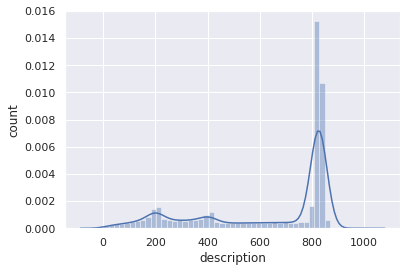

In [20]:
sns.distplot(all_data["description"])
plt.xlabel("description")
plt.ylabel("count")
plt.show()

In [21]:
all_data["total_rooms"] = all_data["bathrooms"] + all_data["bedrooms"]
all_data = all_data.drop(["bathrooms", "bedrooms"], axis=1)

In [22]:
all_data.head()

,accommodates,amenities,bed_type,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,...,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,total_rooms
0,6,84,4,4.0,0,3,1,304,41.831507,2,...,33.788931,-118.154761,12,394,1,0,60.0,1,0,3.0
1,2,350,4,1.0,2,2,1,337,41.834266,2,...,38.934810,-76.978190,23,74,9,17,100.0,1,1,2.0
2,2,447,4,1.0,2,4,1,389,41.829034,2,...,40.695118,-73.926240,39,84,27,0,83.0,1,1,3.0
3,2,224,4,1.0,2,5,1,817,41.779313,2,...,37.796728,-122.411906,31,390,38,0,95.0,1,0,2.0
4,2,226,4,1.0,2,4,1,828,41.810294,2,...,40.785050,-73.974691,30,557,5,0,100.0,0,1,2.0


In [23]:
ntrain = train.shape[0]
ntest = test.shape[0]
print(ntrain, ntest)

55583 18528


In [24]:
df_train = all_data[:ntrain]
df_test = all_data[ntrain:]

In [25]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

In [26]:
model = LGBMRegressor(num_leaves=100, learning_rate=0.05, n_estimators=1000, max_depth=5, objective="regression")

In [27]:
train_y = train["y"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_train, train_y, test_size=0.3, random_state=0)

In [29]:
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=5,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=100,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [30]:
pred = np.expm1(model.predict(X_test))

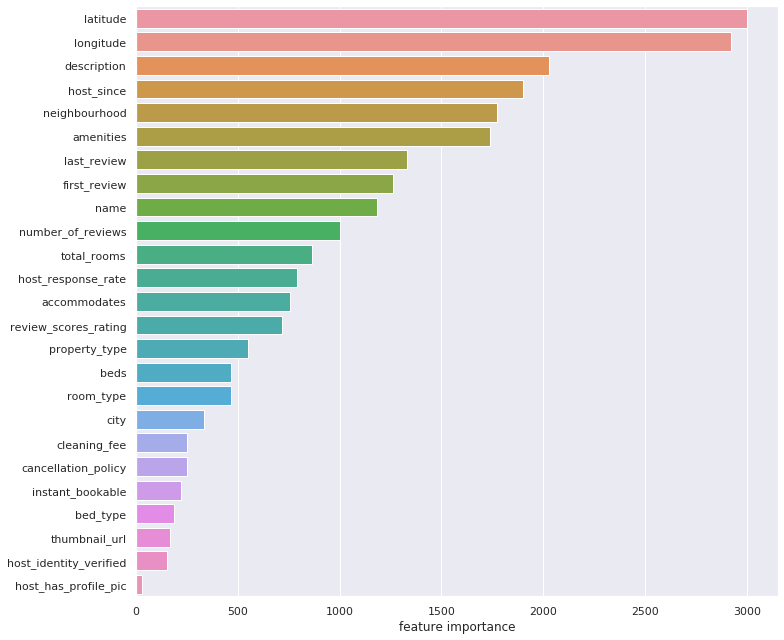

In [31]:
ranking = np.argsort(-model.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=model.feature_importances_[ranking], y=df_train.columns.values[ranking], orient="h")
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(rmse)

186.94169570939255


In [34]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7974340608150277
0.7177151083782332


In [35]:
df_train = pd.concat([df_train, train_y], axis=1)

In [36]:
df_train.head()

,accommodates,amenities,bed_type,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,total_rooms,y
0,6,84,4,4.0,0,3,1,304,41.831507,2,...,-118.154761,12,394,1,0,60.0,1,0,3.0,4.934474
1,2,350,4,1.0,2,2,1,337,41.834266,2,...,-76.978190,23,74,9,17,100.0,1,1,2.0,3.761200
2,2,447,4,1.0,2,4,1,389,41.829034,2,...,-73.926240,39,84,27,0,83.0,1,1,3.0,4.189655
3,2,224,4,1.0,2,5,1,817,41.779313,2,...,-122.411906,31,390,38,0,95.0,1,0,2.0,5.117994
4,2,226,4,1.0,2,4,1,828,41.810294,2,...,-73.974691,30,557,5,0,100.0,0,1,2.0,5.111988


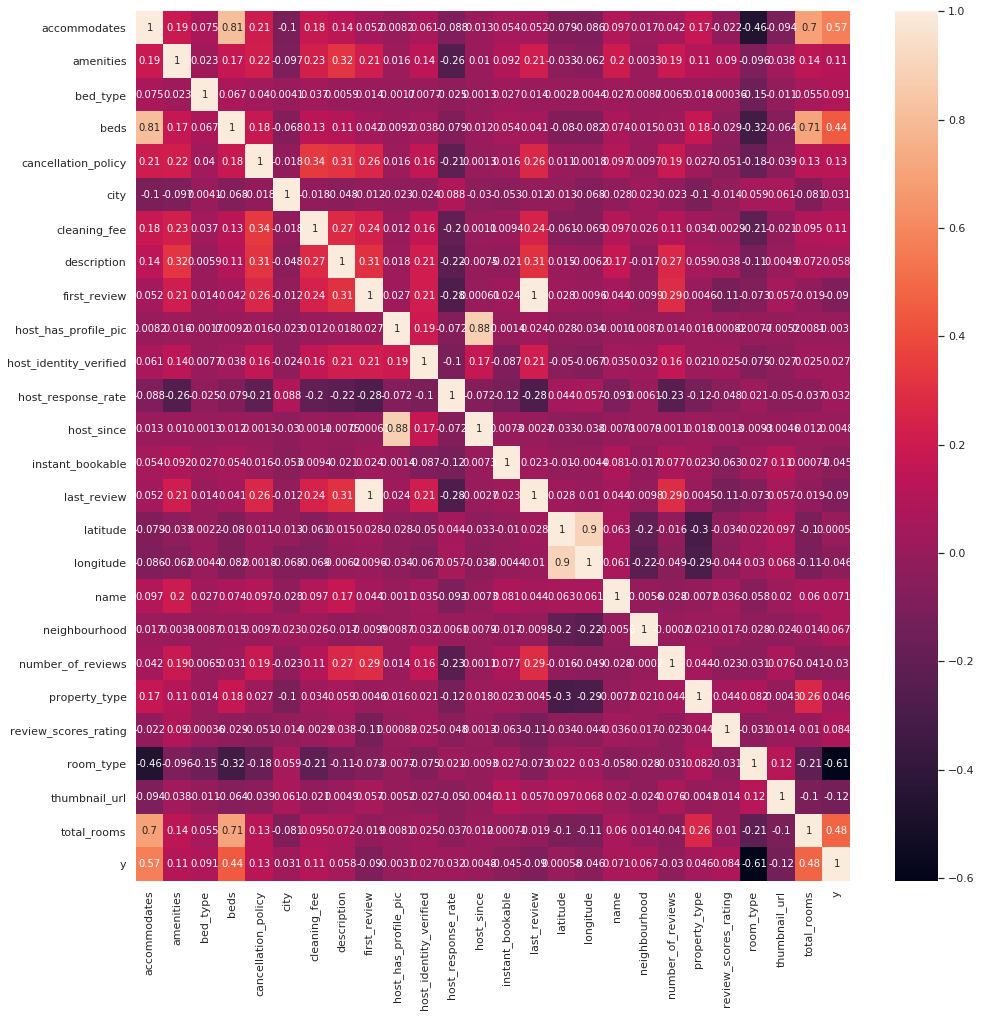

In [37]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_train.corr(), annot=True)

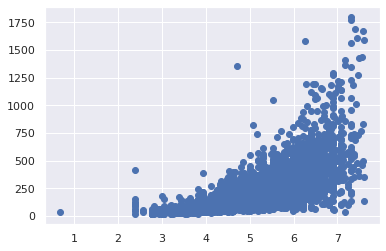

In [38]:
plt.scatter(y_test, pred)
plt.show()

In [39]:
df_train.head()

,accommodates,amenities,bed_type,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,total_rooms,y
0,6,84,4,4.0,0,3,1,304,41.831507,2,...,-118.154761,12,394,1,0,60.0,1,0,3.0,4.934474
1,2,350,4,1.0,2,2,1,337,41.834266,2,...,-76.978190,23,74,9,17,100.0,1,1,2.0,3.761200
2,2,447,4,1.0,2,4,1,389,41.829034,2,...,-73.926240,39,84,27,0,83.0,1,1,3.0,4.189655
3,2,224,4,1.0,2,5,1,817,41.779313,2,...,-122.411906,31,390,38,0,95.0,1,0,2.0,5.117994
4,2,226,4,1.0,2,4,1,828,41.810294,2,...,-73.974691,30,557,5,0,100.0,0,1,2.0,5.111988


In [40]:
df_test.head()

,accommodates,amenities,bed_type,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,...,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,total_rooms
55583,6,277,4,2.0,2,0,1,830,41.841219,2,...,42.359278,-71.069962,33,42,58,17,90.0,0,1,4.0
55584,3,334,4,1.0,1,3,1,837,41.832741,2,...,34.084747,-118.367355,37,583,4,15,100.0,0,1,2.0
55585,2,110,4,1.0,0,4,0,838,0.000000,2,...,40.720541,-73.959192,44,606,0,0,96.0,1,1,1.0
55586,4,219,4,2.0,2,4,0,183,0.000000,2,...,40.681117,-73.944091,23,44,0,0,96.0,0,1,2.0
55587,3,198,4,2.0,2,3,1,743,41.810054,2,...,34.150995,-118.409359,30,394,6,22,92.0,0,1,2.5


In [41]:
df_test.columns

Index(['accommodates', 'amenities', 'bed_type', 'beds', 'cancellation_policy',
       'city', 'cleaning_fee', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'property_type', 'review_scores_rating', 'room_type', 'thumbnail_url',
       'total_rooms'],
      dtype='object')

In [42]:
df_train.columns

Index(['accommodates', 'amenities', 'bed_type', 'beds', 'cancellation_policy',
       'city', 'cleaning_fee', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'property_type', 'review_scores_rating', 'room_type', 'thumbnail_url',
       'total_rooms', 'y'],
      dtype='object')

In [43]:
print(test.shape, df_test.shape)

(18528, 28) (18528, 25)


In [44]:
y_pred = np.expm1(model.predict(df_test))

In [47]:
submission = pd.read_csv("sample_submit.csv", header=None)
submission[1] = y_pred
submission.to_csv("submit2.csv", index=False, header=None)